# Sea Ice Demo

The PCMDI Metrics sea ice driver produces metrics that compare modeled and observed sea ice extent. This notebook demonstrates how to run the PCMDI Metrics sea ice code.

This demo uses three CMIP6 models. The 'siconc' and 'areacello' variables are needed and can be found in the following directories. In addition, six other models are available that can be added to the analyses in this demo:
```
/p/user_pub/pmp/demo/sea-ice/links_siconc  
/p/user_pub/pmp/demo/sea-ice/links_area
```

The observation dataset provided is a satellite derived sea ice concentration dataset from EUMETSAT OSI SAF. More information about this data can be found at the [osi-450-a product page](https://osi-saf.eumetsat.int/products/osi-450-a).

These maps show the different regions used in the analysis along with the mean observed sea ice concentration. The code to generate these figures can be found in the script `create_sector_plots.py`.

In [1]:
%%bash
python create_sector_plots.py

Creating Arctic map
Creating Antarctic map


[WARNING] yaksa: 10 leaked handle pool objects


In [2]:
# To open and display one of the graphics
from IPython.display import display_png, JSON, Image

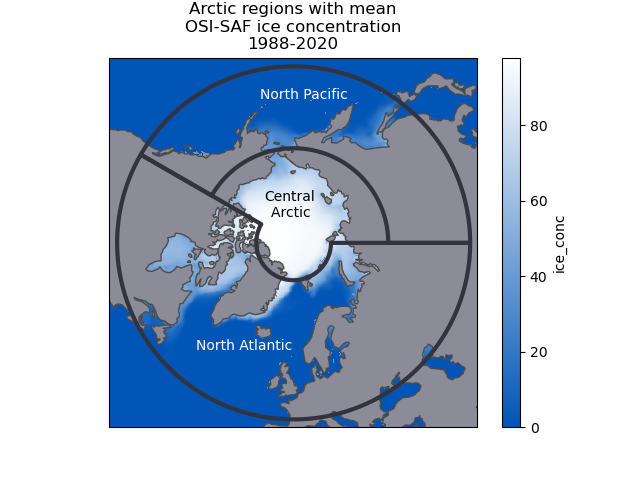

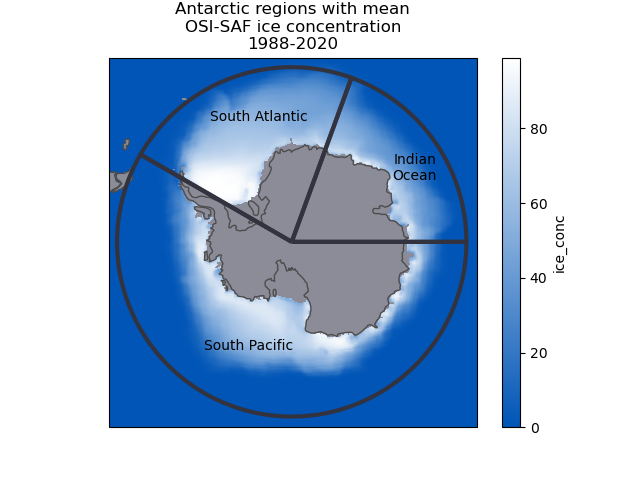

In [3]:
a = Image("Arctic_regions.png")
b = Image("Antarctic_regions.png")
display_png(a,b)

## Basic example

This first case will work with sea ice concentration ouput from a single model, E3SM-1-0. Two overview plots are shown below to visualize the Arctic sea ice in this model.

The code to generate these figures can be found in  `make_demo_sea_ice_plots.py`.

In [4]:
%%bash
python make_demo_sea_ice_plots.py

2024-01-19 16:32:53,136 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


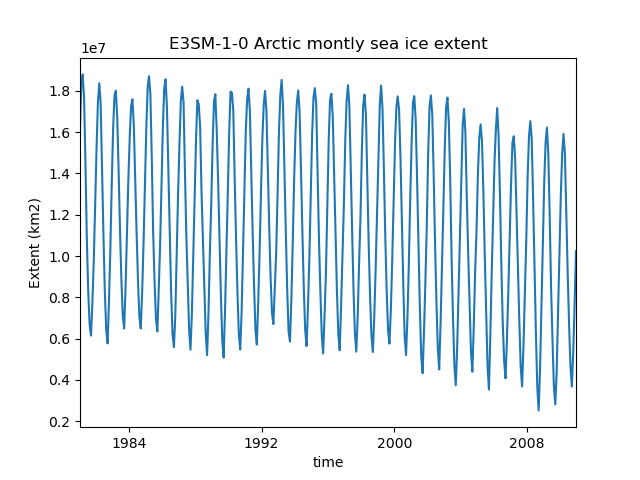

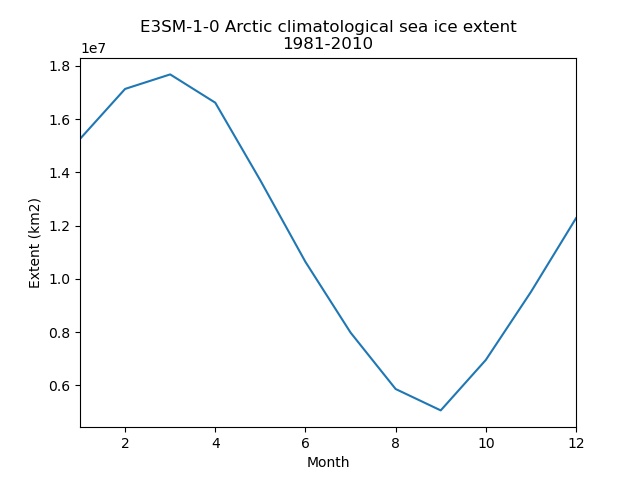

In [5]:
a = Image("E3SM_arctic_tseries.png")
b = Image("E3SM_arctic_clim.png")
display_png(a,b)

The PMP drivers can all read user arguments from parameter files. We provide a demo parameter file, which is shown below. Comments (beginning with a '#') explain each of the parameters.

In [6]:
with open("demo_param_file.py") as f:
    print(f.read())

# Sea ice metrics parameter file

# List of models to include in analysis
test_data_set = [
    "E3SM-1-0",
]

# realization can be a single realization, a list of realizations, or "*" for all realizations
realization = "r1i2p2f1"

# test_data_path is a template for the model data parent directory
test_data_path = "/p/user_pub/pmp/demo/sea-ice/links_siconc/%(model)/historical/%(realization)/siconc/"

# filename_template is a template for the model data file name
# combine it with test_data_path to get complete data path
filename_template = "siconc_SImon_%(model)_historical_%(realization)_*_*.nc"

# The name of the sea ice variable in the model data
var = "siconc"

# Start and end years for model data
msyear = 1981
meyear = 2010

# Factor for adjusting model data to decimal rather than percent units
ModUnitsAdjust = (True, "multiply", 1e-2)

# Template for the grid area file
area_template = "/p/user_pub/pmp/demo/sea-ice/links_area/%(model)/*.nc"

# Area variable name; likely 'areacello'

To see all of the parameters available for the sea ice metrics, run the --help command as shown here:

In [7]:
%%bash
python ice_driver.py --help

usage: ice_driver.py [-h] [--parameters PARAMETERS]
                     [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                     [--case_id CASE_ID] [-v VAR] [--obs_var OBS_VAR]
                     [--area_var AREA_VAR] [--obs_area_var OBS_AREA_VAR]
                     [-r REFERENCE_DATA_SET [REFERENCE_DATA_SET ...]]
                     [--reference_data_path REFERENCE_DATA_PATH]
                     [-t TEST_DATA_SET [TEST_DATA_SET ...]]
                     [--test_data_path TEST_DATA_PATH]
                     [--realization REALIZATION]
                     [--filename_template FILENAME_TEMPLATE]
                     [--metrics_output_path METRICS_OUTPUT_PATH]
                     [--filename_output_template FILENAME_OUTPUT_TEMPLATE]
                     [--area_template AREA_TEMPLATE]
                     [--obs_area_template_nh OBS_AREA_TEMPLATE_NH]
                     [--obs_area_template_sh OBS_AREA_TEMPLATE_SH]
                     [--obs_cell_area OBS_CELL_

[WARNING] yaksa: 10 leaked handle pool objects


The PMP drivers are run on the command line. In this Jupyter Notebook, we use the bash cell magic function %%bash to run command line functions from the notebook.

The PMP sea ice metrics driver call follows the basic format:
ice_driver.py -p parameter_file.py --additional arguments

The following cell runs the driver with the demo parameter file we saw above.

In [8]:
%%bash
python ice_driver.py -p demo_param_file.py

2024-01-19 16:34:01,834 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
INFO::2024-01-19 16:35::pcmdi_metrics:: Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex1/sea_ice_metrics.json
2024-01-19 16:35:05,003 [INFO]: base.py(write:251) >> Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex1/sea_ice_metrics.json


['E3SM-1-0']
Find all realizations: False
OBS: Arctic
Converting units by  multiply 0.01
OBS: Antarctic
Converting units by  multiply 0.01
Model list: ['E3SM-1-0']
/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: E3SM-1-0 r1i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/histor

[WARNING] yaksa: 10 leaked handle pool objects


One of the primary outputs of the PMP is a JSON file containing the metrics values. In this case, the metrics are the mean square errors of the time mean and monthly mean ice extent. Ice extent is defined as the total area covered by sea ice concentration of >= 15%. The metrics are organized by model, realization, and reference dataset.

The metrics JSON from this run is displayed below.

In [9]:
with open("sea_ice_demo/ex1/sea_ice_metrics.json") as f:
    print(f.read())

{
    "DIMENSIONS": {
        "index": {
            "monthly_clim": "Monthly climatology of extent",
            "total_extent": "Sum of ice coverage where concentration > 15%"
        },
        "json_structure": [
            "model",
            "realization",
            "obs",
            "region",
            "index",
            "statistic"
        ],
        "model": [
            "E3SM-1-0"
        ],
        "region": {},
        "statistic": {
            "mse": "Mean Square Error (10^12 km^4)"
        }
    },
    "RESULTS": {
        "E3SM-1-0": {
            "antarctic": {
                "model_mean": {
                    "OSI-SAF": {
                        "monthly_clim": {
                            "mse": "0.4635192339671928"
                        },
                        "total_extent": {
                            "mse": "0.139646926848"
                        }
                    }
                },
                "r1i2p2f1": {
                    "OSI

This driver also outputs a bar chart that visualizes the mean square error between the model and observations. Since there is only one model and one realization in this instance, the bar chart looks very simple. The red bar indicates the mean square error for the time mean ice extent, and the blue bar indicates the mean square error for the climatological ice extent.

In [10]:
!ls {"sea_ice_demo/ex1/MSE_bar_chart.png"}

sea_ice_demo/ex1/MSE_bar_chart.png


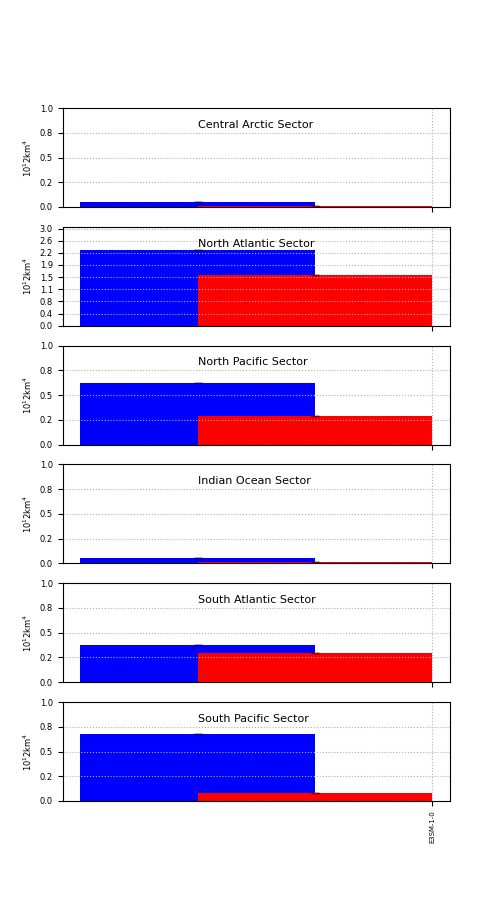

In [11]:
a = Image("sea_ice_demo/ex1/MSE_bar_chart.png")
display_png(a)

## Working with multiple realizations

The sea ice driver can generate metrics based on an average of all available realizations. To do so, provide an asterisk \* as the value to the --realization argument on the command line. Options passed on the command line will supercede arguments in the parameter file. 

In addition, we set the --case_id value to 'ex2' to save results in a new directory.

In [12]:
%%bash
time python ice_driver.py -p demo_param_file.py --realization '*' --case_id "ex2"

2024-01-19 16:36:00,469 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


['E3SM-1-0']
Find all realizations: True
OBS: Arctic
Converting units by  multiply 0.01
OBS: Antarctic
Converting units by  multiply 0.01
Model list: ['E3SM-1-0']

model, runs: E3SM-1-0 ['r1i2p2f1', 'r2i2p2f1', 'r3i2p2f1', 'r4i2p2f1']
/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: E3SM-1-0 r1i2p2f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_188001

INFO::2024-01-19 16:38::pcmdi_metrics:: Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex2/sea_ice_metrics.json
2024-01-19 16:38:53,126 [INFO]: base.py(write:251) >> Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex2/sea_ice_metrics.json


test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_185001-185912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_186001-186912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_187001-187912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_188001-188912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_189001-189912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r4i2p2f1_gr_190001-190912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r4i2p2f1/siconc/siconc_SImon_E3SM-1

[WARNING] yaksa: 10 leaked handle pool objects

real	3m48.529s
user	4m7.945s
sys	1m15.284s


Since we have averaged four different realizations, the resulting statistics are different than seen in example 1. The bar chart now contains error bars showing the overall spread among the realizations.

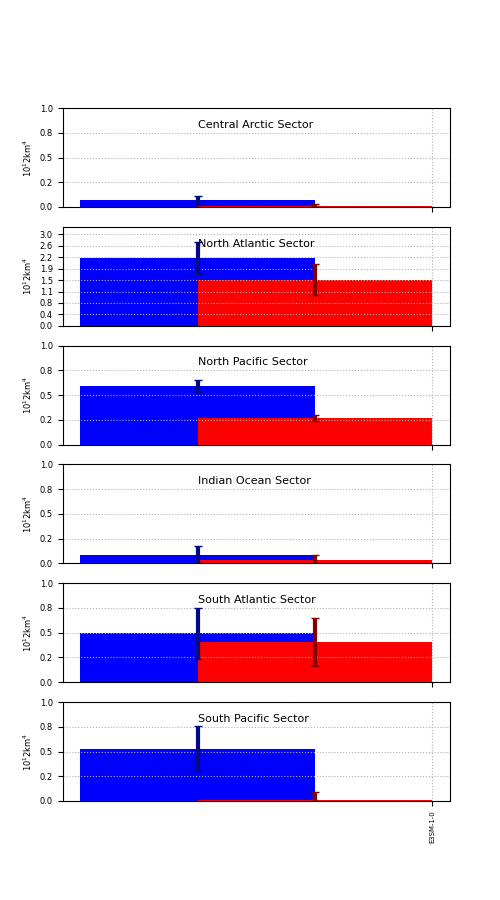

In [13]:
a = Image("sea_ice_demo/ex2/MSE_bar_chart.png")
display_png(a)

# Working with multiple models

Along with using multiple realizations, we can include multiple models in a single analysis. The model data must all follow a single filename template. All model inputs must use the same name and units for the sea ice variable.

The example below shows how to use three models in the analysis, with all available realizations. The models are listed as inputs to the --test_data_set flag.

Want to add more models? Six other model sea ice datasets are available in the directories linked in the notebook introduction.

In [14]:
%%bash
time python ice_driver.py -p demo_param_file.py \
--test_data_set "E3SM-1-0" "CanESM5" "MIROC6" \
--realization '*' \
--case_id "ex3"

2024-01-19 16:39:48,532 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2024-01-19 16:40:31,455 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


['E3SM-1-0', 'CanESM5', 'MIROC6']
Find all realizations: True
OBS: Arctic
Converting units by  multiply 0.01
OBS: Antarctic
Converting units by  multiply 0.01
Model list: ['CanESM5', 'E3SM-1-0', 'MIROC6']

model, runs: CanESM5 ['r2i1p1f1', 'r1i1p1f1', 'r3i1p1f1']
/p/user_pub/pmp/demo/sea-ice/links_area/CanESM5/*.nc
Converting units by  multiply 1e-06

-----------------------
model, run, variable: CanESM5 r2i1p1f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/CanESM5/historical/r2i1p1f1/siconc/siconc_SImon_CanESM5_historical_r2i1p1f1_gn_185001-201412.nc
Converting units by  multiply 0.01

-----------------------
model, run, variable: CanESM5 r1i1p1f1 siconc
test_data (model in this case) full_path:
   /p/user_pub/pmp/demo/sea-ice/links_siconc/CanESM5/historical/r1i1p1f1/siconc/siconc_SImon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc
Converting units by  multiply 0.01

-----------------------
model, run, variable: CanESM5 r3i1p1f1 sicon

2024-01-19 16:43:05,900 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
INFO::2024-01-19 16:47::pcmdi_metrics:: Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex3/sea_ice_metrics.json
2024-01-19 16:47:24,512 [INFO]: base.py(write:251) >> Results saved to a json file: /home/ordonez4/git/pcmdi_metrics/pcmdi_metrics/sea_ice/sea_ice_demo/ex3/sea_ice_metrics.json


   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_193001-193912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_194001-194912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_195001-195912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_196001-196912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_197001-197912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_198001-198912.nc
   /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r3i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r3i2p2f1_gr_199001-199912.nc

[WARNING] yaksa: 10 leaked handle pool objects

real	8m31.064s
user	10m28.047s
sys	2m23.983s


The output JSON now includes metrics for all three models.

In [15]:
with open("sea_ice_demo/ex3/sea_ice_metrics.json") as f:
    print(f.read())

{
    "DIMENSIONS": {
        "index": {
            "monthly_clim": "Monthly climatology of extent",
            "total_extent": "Sum of ice coverage where concentration > 15%"
        },
        "json_structure": [
            "model",
            "realization",
            "obs",
            "region",
            "index",
            "statistic"
        ],
        "model": [
            "CanESM5",
            "E3SM-1-0",
            "MIROC6"
        ],
        "region": {},
        "statistic": {
            "mse": "Mean Square Error (10^12 km^4)"
        }
    },
    "RESULTS": {
        "CanESM5": {
            "antarctic": {
                "model_mean": {
                    "OSI-SAF": {
                        "monthly_clim": {
                            "mse": "5.1043444982100254"
                        },
                        "total_extent": {
                            "mse": "4.816687734317558"
                        }
                    }
                },
       

Now the resulting bar chart shows three different models with their spread.

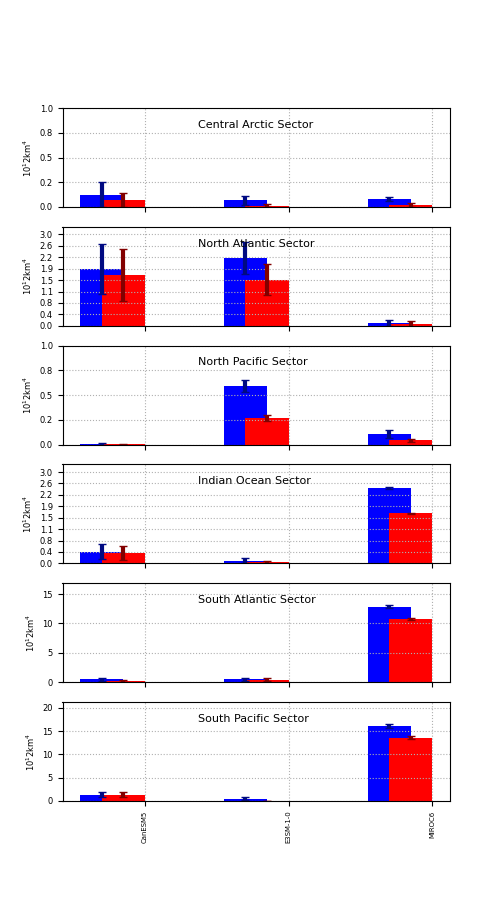

In [16]:
a = Image("sea_ice_demo/ex3/MSE_bar_chart.png")
display_png(a)

# Further exploration

Maybe you want to compare more models, or take a closer look at the model data? Here are links to the data for further exploration.

Data for nine models is available here:
```
/p/user_pub/pmp/demo/sea-ice/links_siconc  
/p/user_pub/pmp/demo/sea-ice/links_area
```

The observational time series can be found at:
```
/p/user_pub/pmp/demo/sea-ice/EUMETSAT
```

For some example plotting code using xcdat and matplotlib, see the scripts that were used to generate the introductory figures:

```
create_sector_plots.py
make_demo_sea_ice_plots.py
```
